### Table of Contents
1. [Question 1](#q1)
2. [Question 2](#q2)
3. [Question 3](#q3)
4. [Question 4](#q4)
5. [Question 5](#q5)
6. [Questions 6-10](#q6-10)
7. [Question 11](#q11)
8. [Question 12](#q12)
9. [Questions 13-15](#q13-15)
10. [Questions 16-17](#q16-17)
11. [Questions 18-20](#q18-20)

In [2]:
import random
import numpy as np
import pandas as pd
import scipy.linalg as linalg
import matplotlib.pyplot as plt
from math import exp, pow

### Question 1 <a id="q1" />
<img src="https://github.com/yijieqiu/coursera-ml-foundations/raw/master/assignment3/q1.png" alt="Question 1" style="width: 600px;"/>

**Answer**: 100

**Explanation**: Plugging in the given parameter values resulting in inequality $0.1^2(1- \frac{8 + 1}{N} \ge 0.008)$. Solving the inequality gives the answer 100.

### Question 2 <a id="q2" />
<img src="https://github.com/yijieqiu/coursera-ml-foundations/raw/master/assignment3/q2.png" alt="Question 2" style="width: 600px;"/>

**Answer**: $H^1126 = H$

**Explanation**:
  * Recall from lecture the geometric view and properties of hat matrix H
      * Hat matrix H creates a **projection** of y onto X-hyperplane
      * H is **positive semi-definite**
      * H is **idempotent**
      * $trace(I - H) = N - (d+1)$
  * Given that H is idempotent, $H = H^1126$
  * Given the trace, (d + 1) eigenvalues of H is 1
  * Given $N > d+1$, there will be zeros scattered in H matrix, making it likely non-invertible
  * Eigenvalues of semi-definite matrices are less than or equal to 1

### Question 3 <a id="q3" />
<img src="https://github.com/yijieqiu/coursera-ml-foundations/raw/master/assignment3/q3.png" alt="Question 3" style="width: 600px;"/>

**Answer**: $err(w) = \max(0, 1-yw^Tx)$

**Explanation**: Plot the value given by each error function for the following senarios and compare them with those given by $sign(w^Tx) \neq y$
    * y = -1, $w^Tx = 1$
    * y = -1, $w^Tx = -1$
    * y = 1, $w^Tx = -1$
    * y = 1, $w^Tx = 1$

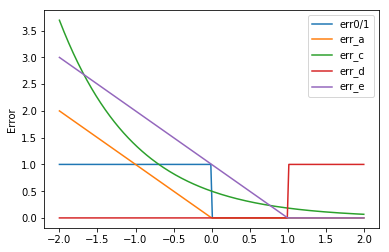

In [22]:
# Question 3: Error functions visualized
y = np.linspace(-2, 2, 200)
# 0/1 error
err_0 = y.copy()
err_0[err_0 >= 0] = 0
err_0[err_0 < 0] = 1

err_a = np.maximum(0, -y)
err_c = np.exp(-y)/2
err_d = y.copy()
err_d[err_d <= 1] = 0
err_d[err_d > 0] = 1
err_e = np.maximum(0, 1 - y)

plt.plot(y, err_0, label="err0/1")
plt.plot(y, err_a, label="err_a")
plt.plot(y, err_c, label="err_c")
plt.plot(y, err_d, label="err_d")
plt.plot(y, err_e, label="err_e")

plt.legend()
plt.ylabel('Error')
plt.show()

### Question 4 <a id="q4" />
<img src="https://github.com/yijieqiu/coursera-ml-foundations/raw/master/assignment3/q4.png" alt="Question 4" style="width: 600px;"/>

**Answer**: $err(w) = \frac{1}{2}\exp(-yw^Tx)$

**Explanation**: Take partial derivative with respect to w for each of the error functions.

### Question 5 <a id="q5" />
<img src="https://github.com/yijieqiu/coursera-ml-foundations/raw/master/assignment3/q5.png" alt="Question 5" style="width: 600px;"/>

**Answer**: $err = \max(0, -yw^Tx)$

**Explanation**: Recall that for a given $w_t$, PLA iterates through the training set and update w for every point where $sign(w^Tx) \ne y$. In other words, error/correction in PLA is either 0, or the entire difference between y and $w^Tx$ (for $y \in {-1, 1}$)

### Questions 6-10 <a id="q6-10" />
#### Question 6
<img src="https://github.com/yijieqiu/coursera-ml-foundations/raw/master/assignment3/q6.png" alt="Question 6" style="width: 600px;"/>

**Answer**: (-2, 0)

**Explanation**:

Take partial derivative with respect to u and v
$$
    \begin{align*}
        E(u,v) &= e^u + e^{2v} + e^{uv} + u^2 - 2uv + 2v^2 -3u - 2v \\
        \frac{\partial{E}}{\partial{u}} &= e^u +  ve^{uv} + 2u - 2v - 3 \\
        \frac{\partial{E}}{\partial{v}} &= 2e^{2v} + ue^{uv} - 2u + 4v - 2 \\
        \\
        &\text{Substituting in (u, v) = (0, 0):} \\
        \\
        \frac{\partial{E}}{\partial{u}} &= 1 +  0 + 0 - 0 - 3 = -2 \\
        \frac{\partial{E}}{\partial{v}} &= 2 + 0 - 0 + 0 - 2 = 0
    \end{align*}
$$

#### Question 7
<img src="https://github.com/yijieqiu/coursera-ml-foundations/raw/master/assignment3/q7.png" alt="Question 7" style="width: 600px;"/>

**Answer**: 2.825

**Explanation**: See SGD code snippet below

In [7]:
# Question 7
def q7_gradient(u, v):
    partial_u = exp(u) + v*exp(u*v) + 2*u - 2*v - 3
    partial_v = 2*exp(2*v) + u*exp(u*v) - 2*u + 4*v -2
    return partial_u, partial_v

def q7_sgd(u0 = 0, v0 = 0, step = 0.01, iteration = 5):
    # starting gradient
    u = u0
    v = v0
    for i in range(iteration):
        gradient_u, gradient_v = q7_gradient(u, v)
        u = u - step * gradient_u
        v = v - step * gradient_v
    print("u: {}, v: {}".format(u, v))
    return u, v

def q7():
    u, v = q7_sgd()
    E = exp(u) + exp(2*v) + exp(u*v) + pow(u, 2) - 2*u*v + 2*pow(v, 2) - 3*u - 2*v
    print("E: {}".format(E))

q7()

u: 0.09413996302028127, v: 0.0017891105951028273
E: 2.8250003566832635


#### Question 8
<img src="https://github.com/yijieqiu/coursera-ml-foundations/raw/master/assignment3/q8.png" alt="Question 8" style="width: 600px;"/>

**Answer**: (1.5, 4, -1, -2, 0, 3)

**Explanation**:
Recall multivariate Taylor series. For *infinitely differentiable function* f in some open neighborhood around (x, y) = (a,b):
$$ f(x,y) = f(a,b) + f_x(a, b)(x - a) + f_y(a, b)(y - b) + \frac{1}{2!}[f_{xx}(a,b)(x-a)^2 + 2f_{xy}(a,b)(x - a)(x - b) + f_{yy}(y - b)^2] + \dots$$

Higher-order derivatives of E:
$$
    \begin{align*}
        E(u,v) &= e^u + e^{2v} + e^{uv} + u^2 - 2uv + 2v^2 -3u - 2v \\
        \frac{\partial{E}}{\partial{u}} &= e^u +  ve^{uv} + 2u - 2v - 3 \\
        \frac{\partial{E}}{\partial{v}} &= 2e^{2v} + ue^{uv} - 2u + 4v - 2 \\
        \frac{\partial{E}}{\partial{u^2}} &= e^u + v^2e^{uv} + 2 \\
        \frac{\partial{E}}{\partial{v^2}} &= 4e^{2v} + u^2e^v + 4 \\
        \frac{\partial{E}}{\partial{u}\partial{v}} &= e^{uv} + uve^{uv} - 2 \\
        \\
        &\text{Substituting in (u, v) = (0, 0):} \\
        \\
        E(u,v) &= 1 + 1 + 1 + 0 - 0 + 0 -0 - 0 = 3 \\
        \frac{\partial{E}}{\partial{u}} &= 1 +  0 + 0 - 0 - 3 = -2 \\
        \frac{\partial{E}}{\partial{v}} &= 2 + 0 - 0 + 0 - 2 = 0 \\
        \frac{\partial{E}}{\partial{u^2}} &= 1 + 0 + 2 = 3 \\
        \frac{\partial{E}}{\partial{v^2}} &= 4 + 0 + 4 = 8 \\
        \frac{\partial{E}}{\partial{u}\partial{v}} &= 1 - 2 = -1
    \end{align*}
$$

Factor in the constant term $\frac{1}{2!}$ from Taylor expansion shown above to reach final answer.

#### Question 9
<img src="https://github.com/yijieqiu/coursera-ml-foundations/raw/master/assignment3/q9.png" alt="Question 9" style="width: 600px;"/>

**Answer**: $-(\triangledown^2E(u.v))^{-1}\triangledown E(u,v)$

**Explanation**:
See [Newton's method in optimization](https://en.wikipedia.org/wiki/Newton%27s_method_in_optimization). To summarize:

Given differentiable equation f, the goal of optimization is to find stationary point  $x^*$ such that $f(x^*) = 0$.
In order to find the iterative optimization function, let $x + \vartriangle{x} = x^*$, by definition and with second-order Taylor expansion:

$$
    \begin{align*}
        0 &= \frac{\partial}{\partial{\vartriangle{x}}}(f(x_n) + f'(x_n)\vartriangle{x} + \frac{1}{2}f''(x_n)\vartriangle{x}^2) \\
        \\
        &= f'(x_n) + f''(x_n)\vartriangle{x} \\
        \\
        \vartriangle{x} &= -\frac{f'(x_n)}{f''(x_n)} \\
        x_{n + 1} &= x_n + \vartriangle{x} = x_n - \frac{f'(x_n)}{f''(x_n)} \\
        \\
        &\text{Genralizing to higher dimensions:} \\
        \\
        x_{n+1} &= x_n - [\mathbf{H}f(x_n)]^{-1}\triangledown{f(x_n)}, n \geq 0 \\
        \\
        &\text{where } \mathbf{H} \text{ is the Hessian matrix}
    \end{align*}
$$

#### Question 10
<img src="https://github.com/yijieqiu/coursera-ml-foundations/raw/master/assignment3/q10.png" alt="Question 10" style="width: 600px;"/>

**Answer**: 2.361
    
**Explanation**: See Newton's method code snippet below

In [8]:
# Question 10
def q10_gradient(u, v):
    du = exp(u) + v*exp(u*v) + 2*u - 2*v - 3
    dv = 2*exp(2*v) + u*exp(u*v) - 2*u + 4*v - 2
    du2 = exp(u) + pow(v, 2)*exp(u*v) + 2
    dv2 = 4*exp(2*v) + pow(u,2)*exp(u*v) + 4
    dudv = exp(u*v) + v*u*exp(u*v) - 2
    return du, dv, du2, dv2, dudv

def q10_newton(u0 = 0, v0 = 0, iteration = 5):
    # starting values
    u = u0
    v = v0
    uv = np.array([[u0], [v0]])
    for i in range(iteration):
        du, dv, du2, dv2, dudv = q10_gradient(u, v)
        dE = np.array([[du], [dv]])
        dE2 = np.array([[du2, dudv], [dudv, dv2]])
        
        # Update value based on Hessian matrix
        uv = uv - linalg.inv(dE2).dot(dE)
        u = uv[0, 0]
        v = uv[1, 0]

    print("u: {}, v: {}".format(u, v))
    return u, v

def q10():
    u, v = q10_newton()
    E = exp(u) + exp(2*v) + exp(u*v) + pow(u, 2) - 2*u*v + 2*pow(v, 2) - 3*u - 2*v
    print("E: {}".format(E))

q10()

u: 0.6118117172604964, v: 0.07049954710163152
E: 2.360823345643139


### Question 11 <a id="q11" />
<img src="https://github.com/yijieqiu/coursera-ml-foundations/raw/master/assignment3/q11.png" alt="Question 11" style="width: 600px;"/>

**Answer**: $x_1, x_2, x_3, x_4, x_5, x_6$

**Explanation**: Plot it

### Question 12 <a id="q12" />
<img src="https://github.com/yijieqiu/coursera-ml-foundations/raw/master/assignment3/q12.png" alt="Question 12" style="width: 600px;"/>

### Questions 13-15 <a id="q13-15" />
#### Question 13
<img src="https://github.com/yijieqiu/coursera-ml-foundations/raw/master/assignment3/q13.png" alt="Question 13" style="width: 600px;"/>

**Answer**: 0.5

**Explanation**: See code snippet below

In [20]:
# Question 13-15 helper method

def generate_sample(size):
    # Generate two 1-D arrays of specified size from unif(-1, 1)
    x1 = np.random.uniform(-1, 1, size)
    x2 = np.random.uniform(-1, 1, size)
    # Stack the two arrays to form matrix in Chi space
    X = np.c_[x1, x2]
    # Add constant term
    X = np.c_[np.ones((size, 1)), X]
    
    Y = np.sign(np.power(x1, 2) + np.power(x2, 2) - 0.6)
    Y[Y == 0] = 1
    # Add 10% noise, by randomly choosing indices and flipping signs of corresponding Y element
    idx = np.random.choice(size, round(size * 0.1))
    Y[idx] *= -1
    return X, Y

In [8]:
def q13(trials, samples):
    err_total = 0
    for i in range(trials):
        X, Y = generate_sample(samples)
        # Analystical soluation to linear regression
        w = linalg.pinv(X.T.dot(X)).dot(X.T).dot(Y)
        y_hat = np.sign(X.dot(w))
        err_in = np.sum(y_hat != Y) / samples
        err_total += err_in
    print('Average E_in', err_total/trials)

q13(1000, 1000)

Average E_in 0.5060770000000001


#### Question 14
<img src="https://github.com/yijieqiu/coursera-ml-foundations/raw/master/assignment3/q14.png" alt="Question 14" style="width: 600px;"/>

**Answer**: $g(x_1, x_2) = sign(-1 - 0.05x_1 + 0.08x_2 + 0.13x_1x_2 + 1.5x_1^2 + 1.5x_2^2)$
    
**Explanation**: See code snippet below

In [41]:
# Question 14

def transform(X):
    row, col = X.shape
    # Target output after transform: 1 + X1 + X2 + X1X2 + X1^2 + X2^2
    # Initialize a row * 6 array as placeholder for transformed X
    X_tr = np.zeros((row, 6))
    X_tr[:, 0:col] = X
    X_tr[:, col] = X[:, 1]*X[:, 2] # X1X2
    X_tr[:, col + 1] = X[:, 1]**2 # X1^2
    X_tr[:, col + 2] = X[:, 2]**2 # X2^2
    return X_tr

def q14(trials, samples):
    err_total = 0
    err_min = 1
    w_tr = np.zeros((1, 6))
    for i in range(trials):
        X, Y = generate_sample(samples)
        X_tr = transform(X)
        w = linalg.pinv(X_tr.T.dot(X_tr)).dot(X_tr.T).dot(Y)
        y_hat = np.sign(X_tr.dot(w))
        err_in = np.sum(y_hat != Y) / samples
        err_total += err_in
        if (err_in < err_min):
            w_tr = w
    print('Best w:' ,w_tr)
    print('Average E_in', err_total/trials)

q14(1000, 1000)

Best w: [-1.05745308  0.09372794  0.05303517  0.16518202  1.51965484  1.64663399]
Average E_in 0.11976299999999972


#### Question 15
<img src="https://github.com/yijieqiu/coursera-ml-foundations/raw/master/assignment3/q15.png" alt="Question 15" style="width: 600px;"/>

**Answer**: 0.1
    
**Explanation**: See output above 

### Questions 16-17
#### Question 16
<img src="https://github.com/yijieqiu/coursera-ml-foundations/raw/master/assignment3/q16.png" alt="Question 16" style="width: 600px;"/>

**Answer**: $$\frac{1}{N}\sum^{N}_{n=1}(\ln(\sum^{K}_{k=1}exp(w_k^Tx_n)) - w^T_{\displaystyle y_n}x_n)$$

**Explanation**:
Best guess based on:
* [Multinomial logistic regression](https://en.wikipedia.org/wiki/Multinomial_logistic_regression)
* [Softmax regression](https://houxianxu.github.io/2015/04/23/logistic-softmax-regression/)

#### Question 17
<img src="https://github.com/yijieqiu/coursera-ml-foundations/raw/master/assignment3/q17.png" alt="Question 17" style="width: 600px;"/>

**Answer**: not sure...
    
**Explanation**: Take partial derivative of loss function from Q16, with respect to $w_i$

### Questions 18-20
#### Question 18
<img src="https://github.com/yijieqiu/coursera-ml-foundations/raw/master/assignment3/q18.png" alt="Question 18" style="width: 600px;"/>

**Answer**: 0.475
    
**Explanation**: See code snippet below

#### Question 19
<img src="https://github.com/yijieqiu/coursera-ml-foundations/raw/master/assignment3/q19.png" alt="Question 19" style="width: 600px;"/>

**Answer**: 0.22
    
**Explanation**: See code snippet below

#### Question 20
<img src="https://github.com/yijieqiu/coursera-ml-foundations/raw/master/assignment3/q20.png" alt="Question 20" style="width: 600px;"/>

**Answer**: 0.475
    
**Explanation**: See code snippet below

In [67]:
# Question 18-20 helper

def load_data(filename):
    data = np.loadtxt(filename)
    col, row = data.shape
    X = np.c_[np.ones((col, 1)), data[:, 0: row - 1]]
    Y = data[:, row - 1:row]
    return X, Y

def sigmoid(s):
    return 1 / (1 + np.exp(-s))

def logistic_reg(X, Y, eta, T, single_pt = False):
    """
    Run logistic regression on the given input set using gradient descent
    
    Parameters:
    X (ndarray): feature matrix
    y (ndarray): target matrix
    eta (float): gradient descent step size
    T (int): number of iterations
    single_pt (bool): whether the gradient should be calculated based on a single point in the input (sequential)
    """
    row, col = X.shape
    w = np.zeros((col, 1))
    idx = 0 # index for sequential access, in cases where single-point gradient is used
    for i in range(T):
        if single_pt:
            if idx >= row:
                idx = 0 # wrap around the input matrix
            gradient = -Y[idx, 0]*X[idx:idx+1, :].T*sigmoid(-X[idx:idx+1, :].dot(w)[0]*Y[idx, 0])
            idx += 1
        else:
            gradient = (-Y * X).T.dot(sigmoid(-X.dot(w)*Y)) / row
        
        # update weight
        w -= eta * gradient
    return w

def logistic_err(X, Y, w):
    y_hat = X.dot(w)
    y_hat[y_hat > 0] = 1
    y_hat[y_hat <= 0] = -1
    return np.sum(y_hat != Y) / len(Y)

In [49]:
# Load data
X, Y = load_data('hw3_train.dat')
X_test, Y_test = load_data('hw3_test.dat')

In [69]:
# Question 18

w = logistic_reg(X, Y, 0.001, 1000)
err_in = logistic_err(X, Y, w)
err_out = logistic_err(X_test, Y_test, w)
print('Err_in:', err_in)
print('Err_out', err_out)

Err_in: 0.467
Err_out 0.477


In [59]:
# Question 19

w = logistic_reg(X, Y, 0.01, 2000)
err_in = logistic_err(X, Y, w)
err_out = logistic_err(X_test, Y_test, w)
print('Err_in:', err_in)
print('Err_out', err_out)

Err_in: 0.197
Err_out 0.22


In [68]:
# Question 20

w = logistic_reg(X, Y, 0.001, 2000, True)
err_in = logistic_err(X, Y, w)
err_out = logistic_err(X_test, Y_test, w)
print('Err_in:', err_in)
print('Err_out', err_out)

Err_in: 0.464
Err_out 0.473
